In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import os

In [2]:
train_path = 'G:\\Data Science\\BPEC\\Glaucomaproject\\train\\'

In [3]:
test_path = 'G:\\Data Science\\BPEC\\Glaucomaproject\\test\\'

In [4]:
my_dir = "G:\\Data Science\\BPEC\\Glaucomaproject\\train\\Glaucoma\\"

In [5]:
os.chdir(my_dir)

In [6]:
os.getcwd()

'G:\\Data Science\\BPEC\\Glaucomaproject\\train\\Glaucoma'

In [7]:
image = my_dir+'\\2 (1).jpg'

In [8]:
imread(image).shape

(219, 270, 3)

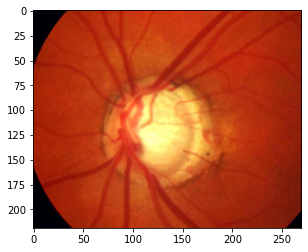

In [9]:
plt.imshow(imread(image))

In [10]:
dim1 = []
dim2 = []

for each_image in os.listdir(my_dir+'\\'):
    img = imread(my_dir+'\\'+each_image)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])
    

In [13]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'glaucoma'):
    
    img = imread(test_path+'glaucoma'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

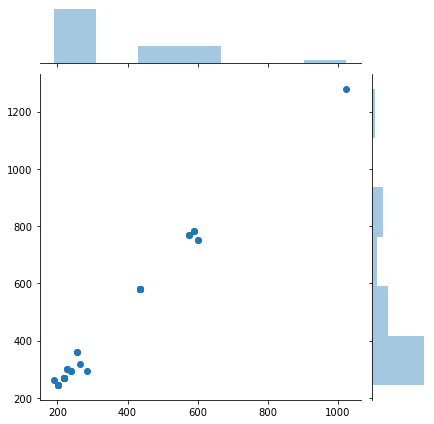

In [11]:
sns.jointplot(dim1,dim2)

In [15]:
print(np.mean(dim1))
print(np.mean(dim2))

491.75
638.125


In [16]:
image_shape = (200,200,3)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
#using image generator for data augumentation
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

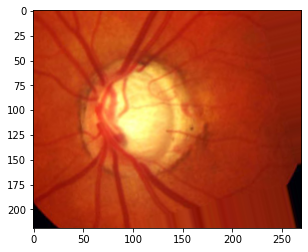

In [53]:
plt.imshow(image_gen.random_transform(imread(image)))

In [31]:
image_gen.flow_from_directory(train_path)

Found 64 images belonging to 2 classes.


In [32]:
image_gen.flow_from_directory(test_path)

Found 16 images belonging to 2 classes.


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [40]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),activation = "relu",input_shape = image_shape,padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64,kernel_size = (3,3),activation = "relu",padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,kernel_size = (3,3),activation = "relu",padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation = "sigmoid"))




In [41]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 80000)            

In [44]:
batch_size = 5

In [56]:
train_gen = image_gen.flow_from_directory(train_path,
                                         target_size = image_shape[:2],
                                         color_mode = 'rgb',
                                         class_mode = 'binary',
                                         batch_size = batch_size)


Found 64 images belonging to 2 classes.


In [57]:
test_gen = image_gen.flow_from_directory(test_path,
                                        target_size = image_shape[:2],
                                        color_mode = 'rgb',
                                        batch_size = batch_size,
                                        class_mode = 'binary')

Found 16 images belonging to 2 classes.


In [58]:
train_gen.class_indices

{'glaucoma': 0, 'nonglaucoma': 1}

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
early_stop = EarlyStopping(monitor = 'val_loss',patience = 2)

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
results = model.fit_generator(train_gen,epochs=20,
                              validation_data=test_gen,
                             callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 13 steps, validate for 4 steps
Epoch 1/20
13/13 [==============================] - 9s 723ms/step - loss: 0.5595 - accuracy: 0.7188 - val_loss: 0.1591 - val_accuracy: 0.8750
Epoch 2/20
13/13 [==============================] - 6s 499ms/step - loss: 0.1700 - accuracy: 0.9531 - val_loss: 0.1056 - val_accuracy: 0.9375
Epoch 3/20
13/13 [==============================] - 6s 497ms/step - loss: 0.0850 - accuracy: 0.9531 - val_loss: 0.2206 - val_accuracy: 0.9375
Epoch 4/20
13/13 [==============================] - 6s 498ms/step - loss: 0.0884 - accuracy: 0.9688 - val_loss: 0.0453 - val_accuracy: 1.0000
Epoch 5/20
13/13 [==============================] - 6s 494ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 6/20
13/13 [==============================] - 7s 570ms/step - loss: 0.0278 - accuracy: 0.9844 - val_loss: 0.0843 - val_accuracy: 1.0000
Epoch 7/20
13/13 [==============================] - 6s 48

In [60]:
losses = pd.DataFrame(model.history.history)

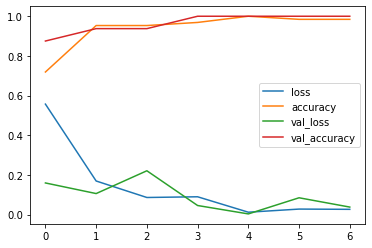

In [61]:
#plotting accurary and losses for train and test data
losses.plot()